# Mini Project: Age vs Spending Score Cluster Analysis
To segment mall customers based on **Age** and **Spending Score** and identify meaningful groups for **targeted marketing strategies**.

Algorithm used is KMeans Clustering Algorithm : K-Means clustering is an unsupervised machine learning algorithm used to group data into k clusters based on similarity.

Steps:

1.K-Means starts by randomly selecting K centroids.

2.Each data point is then assigned to the cluster with the nearest centroid using Euclidean distance.

3.Next, we update each centroid as the mean of its cluster points.

4.This process repeats until centroids stop moving significantly.

The algorithm aims to minimize the total within-cluster sum of squares (measures how close points are to their cluster centers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Mall_Customers.csv'

import pandas as pd
df = pd.read_csv(file_path)
df.head()


Mounted at /content/drive


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
X = df[['Age', 'Spending Score (1-100)']].values

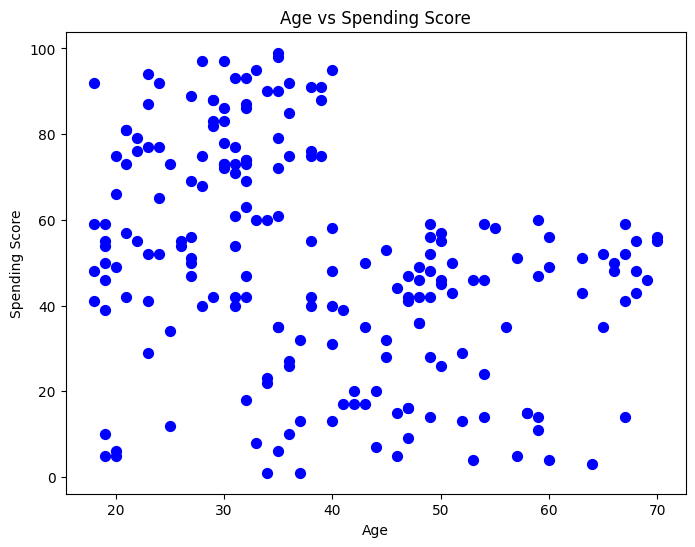

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=50, color='blue')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()


## Elbow Method
- Plots **Number of Clusters (K)** vs **WCSS (Within Cluster Sum of Squares)**.
- **WCSS** decreases as K increases.
- The point where curve **bends like an elbow** → Best K.
- In our case, Elbow suggested **K = 4**.


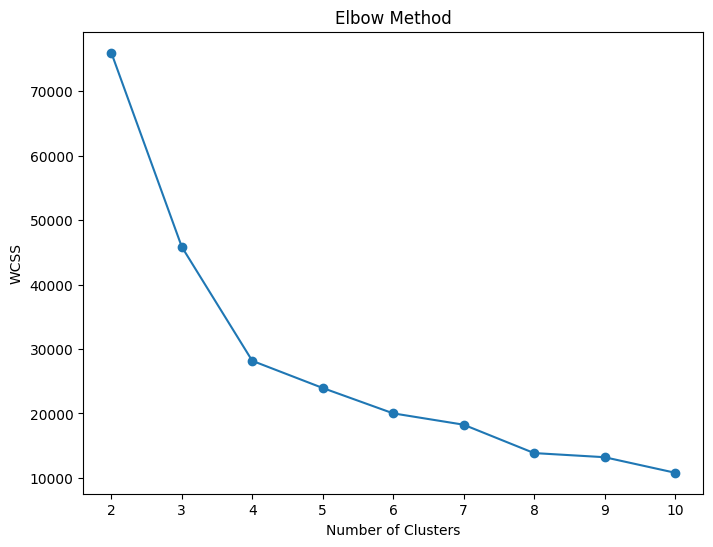

In [6]:
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


##Silhouette Score
- Measures **how well each point fits in its cluster** compared to others.
- Score ranges:
  - **+1** → Well clustered
  - **0** → Overlapping clusters
  - **-1** → Wrong cluster
- Highest score in our case: **0.500 at K=4**.


In [7]:
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f'Clusters = {i}, Silhouette Score = {score:.3f}')

Clusters = 2, Silhouette Score = 0.469
Clusters = 3, Silhouette Score = 0.453
Clusters = 4, Silhouette Score = 0.500
Clusters = 5, Silhouette Score = 0.448
Clusters = 6, Silhouette Score = 0.404
Clusters = 7, Silhouette Score = 0.393
Clusters = 8, Silhouette Score = 0.398
Clusters = 9, Silhouette Score = 0.374
Clusters = 10, Silhouette Score = 0.393


In [8]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


## Cluster Analysis (4 Clusters)

### Cluster 0 (Red)
- Older customers (Age ~ 40–70)
- Medium spending score
- Likely steady spenders (not luxury).

###Cluster 1 (Blue)
- Young customers (Age ~ 18–35)
- Very high spending score
- Premium customers → Spend a lot.

###Cluster 2 (Green)
- Middle-aged customers (Age ~ 35–60)
- Very low spending score
- Budget-conscious customers → Spend very little.

###Cluster 3 (Purple)
- Young to mid-age customers (Age ~ 20–40)
- Average spending score
- Potential customers → Can target with offers.



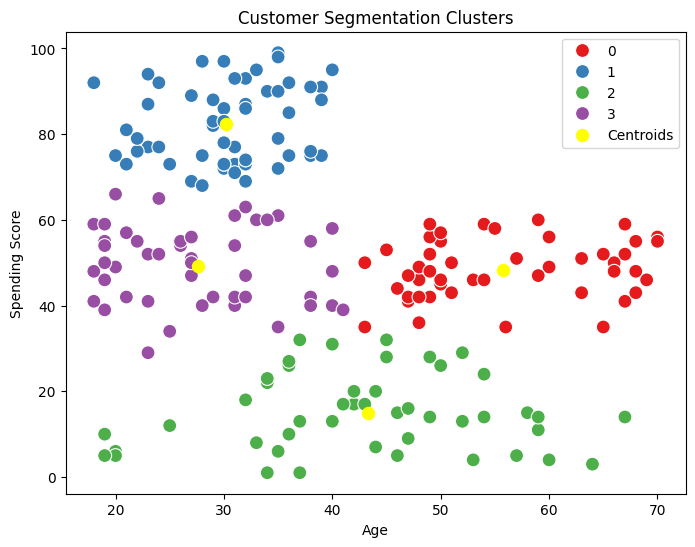

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='yellow', marker='.', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation Clusters')
plt.legend()
plt.show()


In [10]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Cluster Size'})

print(cluster_summary)

               Age  Spending Score (1-100)  Cluster Size
Cluster                                                 
0        55.708333               48.229167            48
1        30.175439               82.350877            57
2        43.291667               15.020833            48
3        27.617021               49.148936            47


Hierarchical Clustering:

A clustering technique that builds a tree-like structure (dendrogram) of clusters.

In [11]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


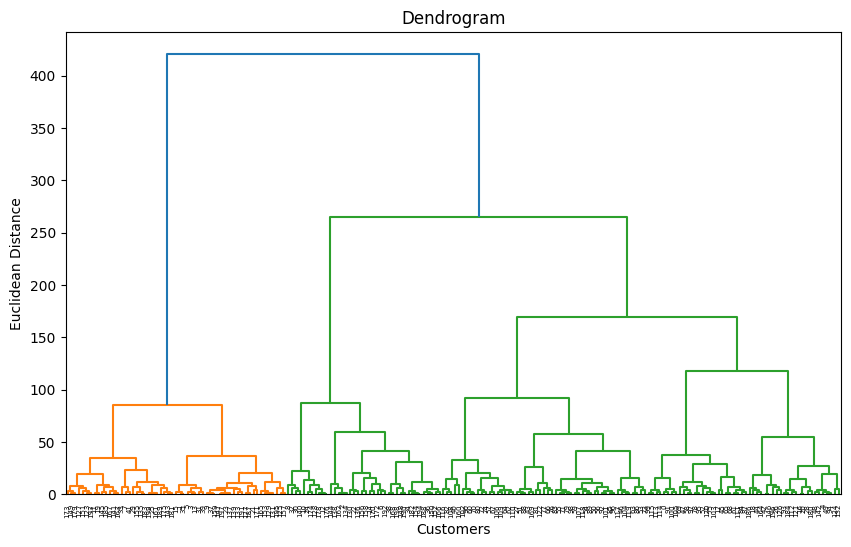

In [12]:

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(X)

df['HC_Cluster'] = hc_labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,HC_Cluster
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,3,0


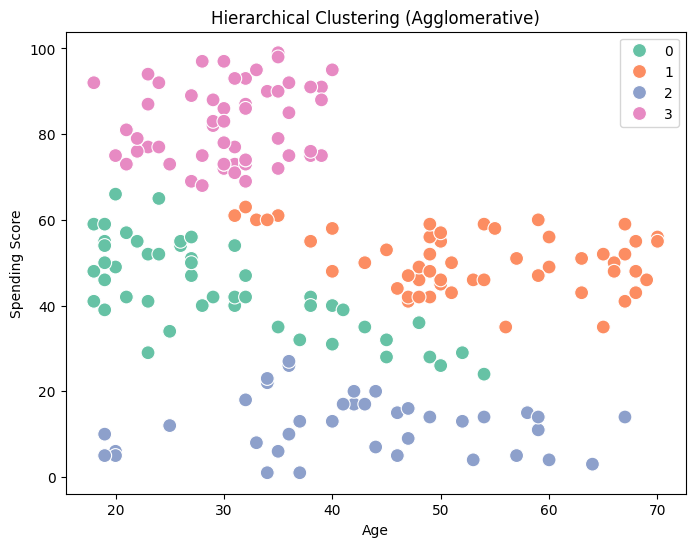

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=hc_labels, palette='Set2', s=100)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering (Agglomerative)')
plt.legend()
plt.show()


In [16]:
hc_score = silhouette_score(X, hc_labels)
kmeans_score = silhouette_score(X, labels)

print(f"Silhouette Score - KMeans: {kmeans_score:.3f}")
print(f"Silhouette Score - Hierarchical: {hc_score:.3f}")


Silhouette Score - KMeans: 0.500
Silhouette Score - Hierarchical: 0.460
